# Evaluate Trees

## Trees - Advantages and Disadvantages

Advantages of Trees
- **Simple** to understand and interpret.
- Requires **little data prep**. No need for data normalisation, dummy variables, missing values to be removed.
- Able to handle **both numerical and categorical data**. 
- Uses a **white box** model. With simple clear rules
- Can be **easily validated**
- **Scales well** with data

Disadvantages of Trees
- **Overfitting**: over-complex trees that do not generalise data well. 
- **Unstable** because small variations in the data result in a  different tree
- **Locally Optimal**: Tree is known to be NP-complete and hence need heuristics like greedy algorithm (locally optimal but may not be globally optimal)
- **Biased Trees**: Not good learner if one class dominates.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [69]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [70]:
train.shape, test.shape

((35211, 17), (10000, 17))

## Prepare the Data

Of all the variables, we will not use the date variables and the duration variables. So out of the 16 input variables, we will use 13 to run the analysis

In [71]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [72]:
train_13 = train.drop(['day','month', 'duration'], axis = 1)
test_13 = test.drop(['day','month', 'duration'], axis = 1)

In [73]:
train_13.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [74]:
test_13.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [75]:
#Load the preprocessing module
from sklearn import preprocessing

In [76]:
categorical_variables =train_13.dtypes[train_13.dtypes=="object"].index.tolist()

In [77]:
categorical_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'deposit']

In [78]:
for i in categorical_variables:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_13[i]))
    train_13[i] = lbl.transform(train_13[i])
    test_13[i] = lbl.transform(test_13[i])

In [53]:
train_13.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,1,-1,0,3,0


In [84]:
train_13_data = train_13.ix[:,0:13]
train_13_target = train_13.iloc[:, -1]

In [85]:
test_13_data = train_13.ix[:,0:13]
test_13_target = train_13.iloc[:, -1]

In [86]:
#label encoding
train_13_data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

## Accuracy Metrics

- Misclassification Rate
- Confusion Matrix
- Precision & Recall
- ROC
- AUC

#### Misclassification Rate

The most basic evaluation metric is accuracy score. if $\hat{y}_i$ is the predicted value of the i-th sample and $y_i$ is the corresponding true value, then the fraction of correct predictions over $n_\text{samples}$ is defined as

$$ accuracy(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i) $$

#### Confusion Matrix
Confusion matrix evaluate the quality of the output of a classifier.

|   | Predicted - Yes  | Predicted - No  |
|--:|---|---|
| Actual - Yes  |  True Positive | False Negative  |
| Actual - No |  False Positive | True Negative  |

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

#### Precision
The precision is the ratio TP / (TP + FP) where TP
is the number of true positives and FP the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall
The recall is the ratio TP / (TP + FN) where TP is the number of true positives and FN the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.

#### Receiver Operating Curve (ROC)

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings.”

- **True Positive Rate** (sensitivity) -> TPR = TP / (TP+FN)
- **False Positive Rate** (1- specifity) -> FPR = FP / (FP+TN)


#### Area Under Curve (AUC)
The AUC computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number.



## How do choose the Error Metric

- What is the objective for the problem?
- Which error metric would be best help address that problem?

## Build Models and Evaluate

In [175]:
from sklearn import tree
from sklearn import metrics

In [328]:
def model_evaluation(data, target, model, model_name):
    model_fit = model.fit(data, target)
    pred = model_fit.predict(data)
    proba = model_fit.predict_proba(data)
    
    fpr, tpr, thresholds = metrics.roc_curve(target, proba[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    
    print("Model: %s" % model_name)

    # Scores for the model
    print("accuracy: %.3f" % metrics.accuracy_score(target, pred))
    print("recall: %.3f" % metrics.precision_score(target, pred))
    print("precision: %.3f" % metrics.recall_score(target, pred))
    print("confusion_matrix:")
    print(metrics.confusion_matrix(target, pred))
    print("auc: %.3f" % metrics.auc(fpr, tpr))
    
    # ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return roc_auc

## Build Models and Evaluate

### Benchmark Model

Our benchmark model is that there is only "no" in the model. We need to improve on this to realistically do better.

In [322]:
benchmark = tree.DecisionTreeClassifier(max_depth = 1)

In [323]:
benchmark

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [324]:
model_evaluation(train_13_data, train_13_target, benchmark, "benchmark")

Model: benchmark
accuracy: 0.883
recall: 0.000
precision: 0.000
confusion_matrix:
[[31092     0]
 [ 4119     0]]
auc: 0.603


/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.60327839406000316

### Decision Tree Model - Shallow

In [325]:
Shallow = tree.DecisionTreeClassifier(max_depth=10)

In [326]:
Shallow

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [327]:
model_evaluation(train_13_data, train_13_target, Shallow, "Shallow")

Model: Shallow
accuracy: 0.904
recall: 0.821
precision: 0.234
confusion_matrix:
[[30882   210]
 [ 3157   962]]
auc: 0.803


0.80290168309716348

### Decision Tree Model - Full

In [318]:
Full = tree.DecisionTreeClassifier()

In [319]:
Full

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Model: Full
accuracy: 1.000
recall: 1.000
precision: 0.996
confusion_matrix:
[[31091     1]
 [   16  4103]]
auc: 1.000


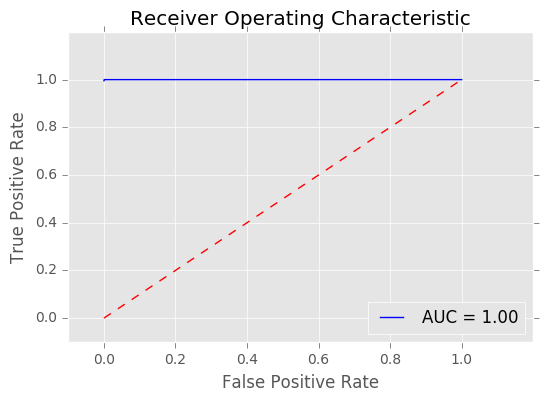

0.99999882874675239

In [320]:
model_evaluation(train_13_data, train_13_target, Full, "Full")

## Solving the Overfitting Problem
There are multiple approach to mitigate Tree Overfitting Problem. The approaches that can be used are
- Setting maximum depth
- Setting minimum samples 
- Pruning tress
- Balancing classes
- Ensemble trees


### Exercise 1: Find the ROC curve for balancing the classes

### Exercise 2: Plot the auc values for  maximum depth (2 to 10)

### Exercise 3: Plot the auc values for different minimum sample split (2 to 8)

## K-Fold Cross Validation

So far we have been evaluating our metrics on the train data. However, there is an important modelling lesson: you should never evaluate a model on the same data it was fit to because it’s going to seem more confident. Instead, it’s better to divide the data up and use one piece to fit the model and the other piece to evaluate it. A popular technique for this is called **k-fold cross validation**. You randomly hold out x% of the data and fit the model to the rest. You need to repeat this a few times because of random variation.

![](img/cross_validation.png)